<div style='background-color:#4e9bf8; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'>Heart Failure Risk Analysis – Data Analytics Project</h1>
</div>

<h2 style='color:#4e9bf8;'>Objectives</h2>

- Develop data visualizations to support insights.
- Create linear regression to predict future heart failure.



<h2 style='color:#4e9bf8;'>Inputs</h2>

- **Dataset:** `cleaned_heartdataset.csv`
- **Required Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly
- **Columns of Interest:**
  - **Demographics:** Age, Sex
  - **Medical Indicators:** ChestPainType, RestingBP, FastingBS, Cholesterol, RestingECG, MaxHR, ExerciseAngina

<h2 style='color:#4e9bf8;'>Outputs</h2>

- **Basic Data Visualisations:**
  - Bar chart to show distribution of heart failure risk across demographics with target variable.
  - Histograms for distribution or features like Age, RestingBP, and Cholesterol.
  - Boxplot to identify outliers in numerical data.
  - Bar chart to compare categorical variables with the target variable.
  - Stacked bar chart to check the porportions of categorical variables. 
  - Correlation heatmap to assess relationships between numerical variables and the target variable (HeartDisease).
  - Pie charts for proportions of HeartDisease vs. No HeartDisease.
  - Clustering Plots (using PCA) to group individuals based on similar risk factor patterns.


- **Advance Data Visualisations:**
    - Create wireframe for dashboard
    - Create dashboard in PowerBi

---

<div style='background-color:#4e9bf8; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'>Section 2 :  Basic Data Visualisation</h1>
</div>

<h2 style='color:#4e9bf8;'>Changing work directory</h2>

To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

's:\\Documents\\Code Institute\\vscode-projects\\Heart-Failure-Capstone\\Heart-Failure-Risk-Analysis\\jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:
  * os.path.dirname() to get the parent directory
  * os.chir() to define the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


Confirming the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

's:\\Documents\\Code Institute\\vscode-projects\\Heart-Failure-Capstone\\Heart-Failure-Risk-Analysis'

<h2 style='color:#4e9bf8;'>Importing Libraries and Packages</h2>

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.graph_objects import Figure, Scatter
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [5]:
df = pd.read_csv("Outputs\\cleaned_heartdataset.csv")

<h2 style='color:#4e9bf8;'>Data Visualisation of Analyses</h2>

<h3 style='color:#4e9bf8;'>Exploratory Data Analysis (EDA)</h3>

We are going to preview the dateframe first to check correct dataset has been imported in dataframe

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RiskScore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,True,True,False,False,True,False,False,False,True,-0.292009
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,False,False,True,False,True,False,False,True,False,0.288617
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,True,True,False,False,False,True,False,False,True,-0.918545
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,False,False,False,False,True,False,True,True,False,-0.074396
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,True,False,True,False,True,False,False,False,True,-0.417702


Checking the distribution of the  categorical variables(Sex, ChestPainType, RestingECG and HeartDisease)      

In [7]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Visualize frequency counts for categorical columns
fig = make_subplots(rows=len(categorical_columns)//3 + len(categorical_columns)%3, cols=3, subplot_titles=categorical_columns)

custom_palette = ['#4e9bf8', '#CC0033', '#FEA5B1', '#acdffe', '#FE7062']

for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    fig.add_trace(
        go.Bar(
            x=counts.index,
            y=counts.values,
            marker_color=custom_palette,
            name=col,
            text=counts.values,
            textposition='auto',
            texttemplate='%{text}',  # Keep only the value in the hover text
            insidetextfont=dict(color='white'),
            hoverlabel=dict(
                font=dict(color='white')
            )
        ),
        row=i//3 + 1,
        col=i%3 + 1
    )

fig.update_layout(
    title_text='Number of Occurrences for Categorical Columns',
    height=800,
    showlegend=False,
    yaxis_title='Number of Occurrences'
)

fig.show()


Using Plotly to boxplot to check outliers

In [8]:
# Select numerical columns
numerical_features = df.select_dtypes(include=[float, int]).columns

# Calculate skewness and kurtosis
# Skewness and Kurtosis for Numerical Features
results = []
for col in numerical_features:
    col_skewness = skew(df[col].dropna())  # Drop NaN values for calculation
    col_kurtosis = kurtosis(df[col].dropna())  # Drop NaN values for calculation
    results.append({'Feature': col, 'Skewness': col_skewness, 'Kurtosis': col_kurtosis})

# Create a DataFrame
result_df = pd.DataFrame(results)

# Custom palette colors
custom_palette = ['#4e9bf8'] 

# Visualize using Plotly boxplots
fig = make_subplots(rows=3, cols=3, subplot_titles=numerical_features)

for i, col in enumerate(numerical_features):
    fig.add_trace(
        go.Box(
            y=df[col],
            name=col,
            marker_color=custom_palette[0],
            text=df[col],
            hoverlabel=dict(
                font=dict(color='white')
            )
        ),
        row=i//3 + 1,
        col=i%3 + 1
    )

fig.update_layout(
    title_text='Boxplots of Numerical Features',
    height=800,
    showlegend=False
)

fig.show()


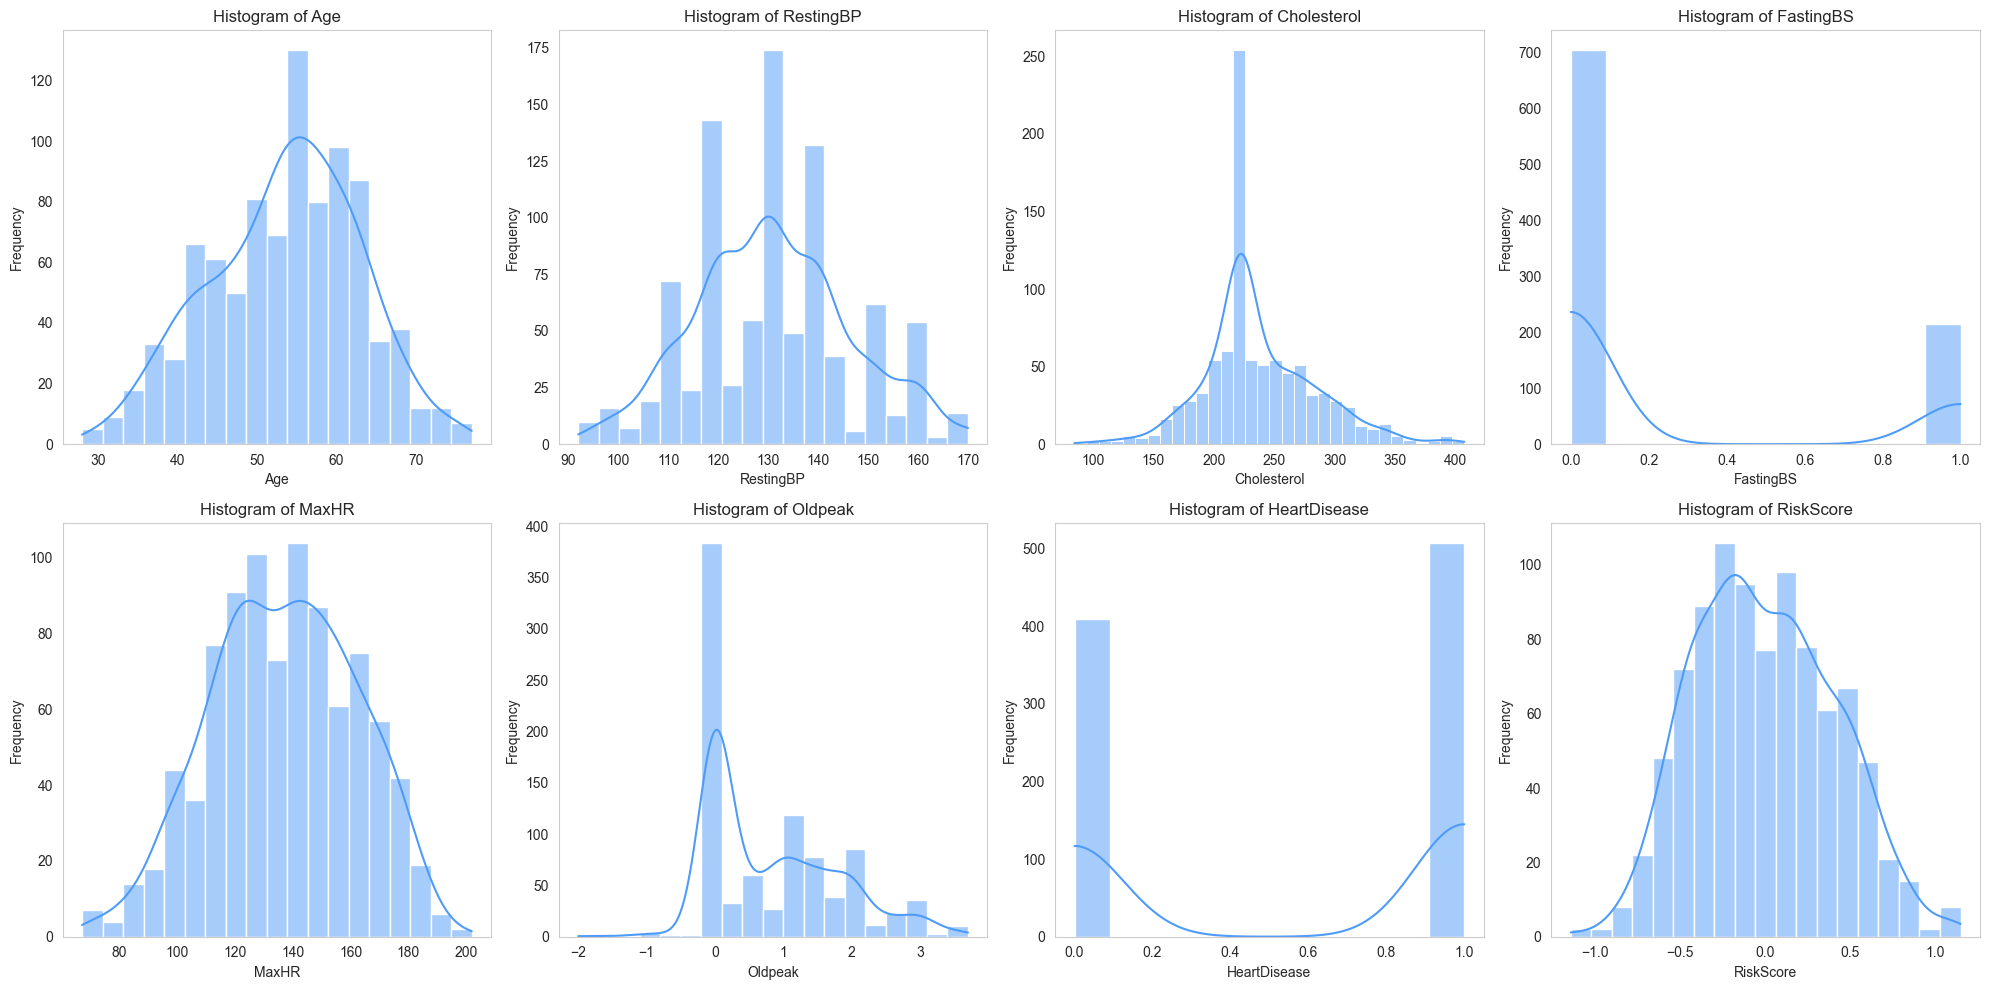

In [11]:
# Create separate histograms for each numerical feature and display them side by side
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, color=custom_palette[0], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()


In [12]:
heart_disease_counts = df['HeartDisease'].value_counts(normalize=True) * 100
heart_disease_counts.index = ['No Heart Disease', 'Heart Disease']
custom_palette = ['#4e9bf8', '#CC0033', '#FEA5B1', '#acdffe', '#FE7062']

# Plot the pie chart
fig = px.pie(
    values=heart_disease_counts.values,
    names=heart_disease_counts.index,
    title='Proportions of HeartDisease vs. No HeartDisease',
    color_discrete_sequence=custom_palette
)

fig.update_traces(textposition='inside', textinfo='percent+label', textfont=dict(color='white'))

# Reduce figure size
fig.update_layout(width=500, height=500)

fig.show()

Plotting the correlation heatmap to show  relationships between numerical variables and the target variable (HeartDisease)

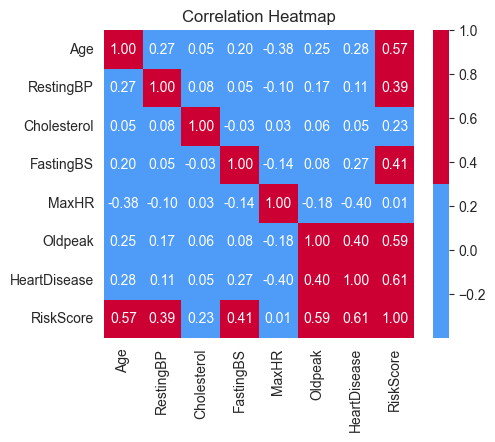

In [13]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Custom palette colors
custom_palette = ['#4e9bf8', '#CC0033'] 
plt.figure(figsize=(5, 4))  # Adjusted the figure size
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap=sns.color_palette(custom_palette, as_cmap=True))
plt.title("Correlation Heatmap")
plt.show()

Plotting the porportions of categorical variables in stacked bar chart

In [14]:
# Defining the target variable and boolean features
target = 'HeartDisease'  
boolean_features = categorical_columns.tolist()

# Calculating Proportions and Visualizing
fig = make_subplots(rows=(len(boolean_features) + 2) // 3, cols=3, subplot_titles=boolean_features)

for i, col in enumerate(boolean_features):
    proportion = df.groupby(col)[target].value_counts(normalize=True).unstack() * 100
    
    # Plotting the proportions
    for j, heart_disease_status in enumerate(proportion.columns):
        show_legend = i == 0  # Show legend only for the first subplot
        fig.add_trace(
            go.Bar(
                x=proportion.index,
                y=proportion[heart_disease_status],
                name=f'Heart Disease {heart_disease_status}' if show_legend else None,
                marker_color=custom_palette[j],
                showlegend=show_legend,
                hoverlabel=dict(
                font=dict(color='white')
            )
            ),
            row=(i // 3) + 1,
            col=(i % 3) + 1
        )

# Update layout
fig.update_layout(
    title_text="Proportions of Heart Disease vs No Heart Disease",
    height=800,
    showlegend=True
)

fig.show()

 Visualizing Gender Distribution through bar chart

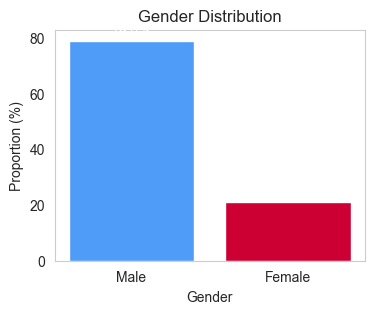

In [15]:
# Calculate the gender distribution in percentage
gender_dist = df['Sex_M'].value_counts(normalize=True) * 100
gender_dist.index = ['Male', 'Female']
gender_dist = gender_dist.round(1)  # Round to one decimal place

# Plot the gender distribution
plt.figure(figsize=(4, 3))
plt.bar(gender_dist.index, gender_dist.values, color=['#4e9bf8', '#CC0033'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.grid(False)  # Remove gridlines

# Add text labels on the bars
for i, value in enumerate(gender_dist.values):
    plt.text(i, value + 1, f'{value}%', ha='center', va='bottom', color='white')

plt.show()


Visualizing Age Distribution through bar chart

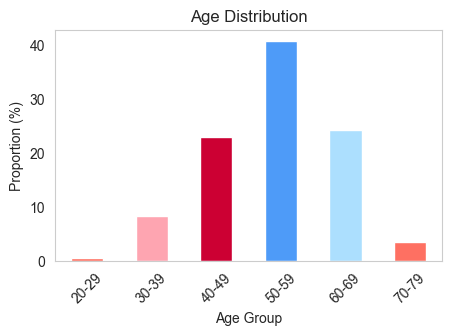

In [16]:
plt.figure(figsize=(5, 3))
age_dist = df['AgeGroup'].value_counts(normalize=True) * 100
age_dist.sort_index().plot(kind='bar', color=('#FE7062', '#FEA5B1','#CC0033', '#4e9bf8', '#acdffe', '#FE7062' ))
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.grid(False)  # Remove gridlines
plt.show()

Using stacked bar to visualise diagnosis proportions by gender and age

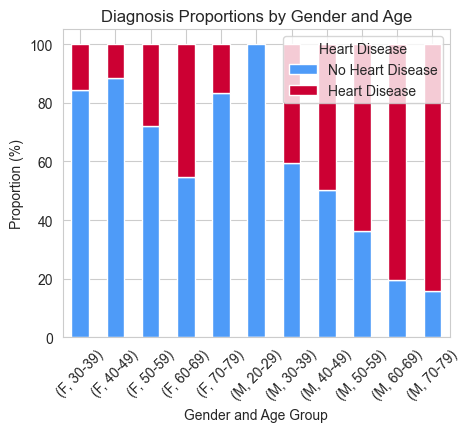

In [17]:
# Calculate the diagnosis distribution by gender and age group
diagnosis_dist = df.pivot_table(index=['Sex', 'AgeGroup'], columns='HeartDisease', aggfunc='size', fill_value=0)
diagnosis_dist = diagnosis_dist.div(diagnosis_dist.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plotting the stacked bar chart
diagnosis_dist.columns = ['No Heart Disease', 'Heart Disease']  # Update column names for clarity
diagnosis_dist.plot(kind='bar', stacked=True, color=custom_palette, figsize=(5, 4))
plt.title('Diagnosis Proportions by Gender and Age')
plt.xlabel('Gender and Age Group')
plt.ylabel('Proportion (%)')
plt.legend(title='Heart Disease', loc='upper right')
plt.xticks(rotation=45)
plt.show()


Plotting observed vs expected frequencies as per chi-square test results to check the statistical significance of categorical variables

In [24]:
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df[target])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Plotting observed vs expected Occurences
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Observed Occurences for {col}', f'Expected Occurences for {col}'])
    show_legend = i == 0  # Show legend only for the first subplot

    # Observed Occurences
    for i in range(len(contingency_table.columns)):
        fig.add_trace(
            go.Bar(
                x=contingency_table.index,
                y=contingency_table.iloc[:, i],
                name=f'Observed {contingency_table.columns[i]}',
                marker_color=custom_palette[i]
            ),
            row=1,
            col=1
        )

    # Expected Occurences
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
    for i in range(len(expected_df.columns)):
        fig.add_trace(
            go.Bar(
                x=expected_df.index,
                y=expected_df.iloc[:, i],
                name=f'Expected {expected_df.columns[i]}',
                marker_color=custom_palette[i]
            ),
            row=1,
            col=2
        )

    fig.update_layout(
        title_text=f'Observed vs Expected Occurences',
        height=400,
        width=850,
        showlegend=True
    )

    fig.show()

Now we are going to make cluster plots using Principal Component Analysis (PCA) to determine feature importance for further modelling

In [19]:
# Scaling the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Applying PCA to reduce to 2 principal components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_data)

# Adding the PCA results to the dataframe
df['PCA1'] = pca_2d_result[:, 0]
df['PCA2'] = pca_2d_result[:, 1]

# Custom palette colors
custom_palette = ['#4e9bf8', '#CC0033']

# Plotting the clusters using Plotly
fig = px.scatter(
    df, x='PCA1', y='PCA2', color='HeartDisease',
    title='Cluster Plot using PCA',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'},
    color_continuous_scale=custom_palette,
    hover_data=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
    template='plotly_white'
)

# Update marker size and layout
fig.update_traces(marker=dict(size=8, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    coloraxis_colorbar=dict(title='Heart Disease'),
    legend=dict(title='Heart Disease', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()


In [20]:
# Select the most important features
important_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

# Create a pair plot for the selected features
fig = px.scatter_matrix(df[important_features], dimensions=important_features[:-1], color='HeartDisease', title='Pairwise Relationships of Important Features by Heart Disease', color_continuous_scale=custom_palette)

# Update layout
fig.update_layout(
    width=1200,
    height=800
)

fig.show()

<div style='background-color:#4e9bf8; padding: 15px; border-radius: 5px;'>
<h2 style='color:#FEFEFE; text-align:center;'>Conclusion & Next Step</h2>
</div>

In this section, we explored various aspects of heart failure risk using multiple data visualizations based o the analyes done in previous ETL section. Each visualization provided unique insights into the dataset, helping us understand the underlying patterns and relationships.

<h4 style='color:#4e9bf8;'>Key Findings</h4>

<h5 style='color:#4e9bf8;'>1. Age Distribution </h5>
The age distribution plot shows that the majority of patients are between 40 and 70 years old, with a peak around 60 years. This indicates that heart failure is more prevalent in older age groups.

<h5 style='color:#4e9bf8;'>2. Gender Distribution </h5>
The gender distribution chart reveals a higher prevalence of heart disease in males compared to females. This aligns with existing medical research that suggests men are at a higher risk of heart disease.

<h5 style='color:#4e9bf8;'>3. Chest Pain Type </h5>

The bar chart for chest pain types indicates that 'ASY' (asymptomatic) is the most common type among patients with heart disease. This highlights the importance of regular check-ups, as many patients may not experience noticeable symptoms.

<h5 style='color:#4e9bf8;'>4. Resting Blood Pressure</h5>

The scatter plot of resting blood pressure against age demonstrates a positive correlation, suggesting that blood pressure tends to increase with age. This emphasizes the need for blood pressure management, especially in older adults.

<h5 style='color:#4e9bf8;'>5. Cholesterol Levels</h5>

The box plot of cholesterol levels shows a wide range of values, with some patients having extremely high cholesterol. This underscores the importance of monitoring and managing cholesterol to reduce heart disease risk.

<h5 style='color:#4e9bf8;'>6. Maximum Heart Rate </h5>

The line plot of maximum heart rate achieved during exercise stress tests reveals that patients with heart disease generally have lower maximum heart rates. This suggests that reduced exercise capacity could be an indicator of heart disease.

<h5 style='color:#4e9bf8;'>7. PCA Cluster Plot </h5>

The PCA cluster plot provides a visual representation of the data in two dimensions, highlighting the separation between patients with and without heart disease. The clusters formed by the principal components indicate distinct patterns that can be used for further analysis and predictive modeling.

Overall, these visualizations have provided valuable insights into the important factors associated with heart failure risk. By understanding these patterns, we can better identify high-risk individuals and develop targeted interventions to improve heart health outcomes.


<h4 style='color:#4e9bf8;'>Next Steps</h4>

- Creating a predictive model to assess heart failure risk based on the identified important features
- Develop a dashboard to visualize the insights and make the analysis accessible to stakeholders

---